In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score
#정확도,정밀도,재현율, auc 값을 불러낸다.
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve, roc_curve
#f1 점수, 오차행렬, 정밀도 재현율 곡선, roc곡선을 불러낸다.
from sklearn.preprocessing import StandardScaler
#포준화라는 클래스를 불러온다.
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 불러온다.

diabetes_data=pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


nagative값이 500개, positive값이 268개로 상대적으로 nagative값이 많다.

In [20]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve

def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

NUll값이 없고 피처 타입이 모두 숫자형이다.
임신 횟수, 나이와 같은 숫자형 피처와 당뇨 검사 수치 피처로 구성된 특징은 별도의 피처 인코딩이 필요하지 않다.

In [26]:
x=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=156,stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
pred_proba=lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)
                                            

오차행렬
[[88 12]
 [23 31]]
정확도:0.7727,정밀도:0.7209, 재현율:0.5741, F1:0.6392, AUC:0.7919


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


전체 데이터의 65%가 nagative이므로 정확도보다 재현율에 초점을 맞춘다.
=>임계값을 나추면 재현율이 높아지기 때문에 nagative개수를 줄이기 위해서

In [44]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율을 ndarray로 추출
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary], label='recall')
    
    
    #threshold 값 x축을 0.1단위로 변경
    start,end=plt.xlim()
    plt.xticks(np.arange(start,end,0.1),2)
    
    #x축,y축labelrhk legend, 그리고 grid 설정
    plt.xlabel('Treshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
    

TypeError: 'int' object is not iterable

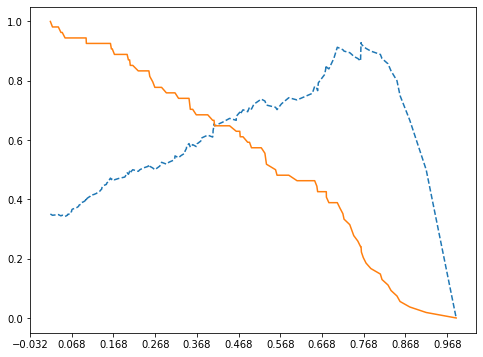

In [45]:
pred_proba_c1=lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

재현율 조건을 보면 임계값을 0.42 정도로 낮추면 정밀도와 재현율이 균형을 맞춘다.

하지만 두개의 지표 모두 0.7이 안되는 수치인다.
때문에 DataFrame의 describe을 호출하여 피처 값의 분포도를 살펴본다.

In [47]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

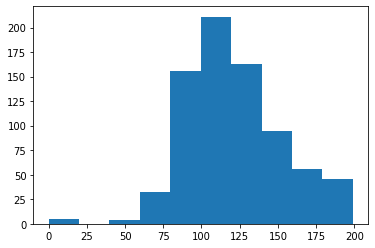

In [48]:
#Glucose는 포도당 수치인데 min값이 0인 경우가 꽤 있다. 이는 말도 안되는 수치이다.
plt.hist(diabetes_data['Glucose'],bins=10)

min()값이 0으로 되어 있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인하자
확인할 피처는 Glucose, BloodPressure,SkinThickness,Insulin,BMI이다.

In [54]:
zero_features=['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
#0값을 검사할 피처 병 리스트

#전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0건수는 5, 퍼센트는 0.65%
BloodPressure 0건수는 35, 퍼센트는 4.56%
SkinThickness 0건수는 227, 퍼센트는 29.56%
Insulin 0건수는 374, 퍼센트는 48.70%
BMI 0건수는 11, 퍼센트는 1.43%


Skinthickness와 Insulin의 0값은 많다.
삭제하기는 어렵기 때문에  평균 값으로 대체한다.

#근데 Skinthickness는 피부염이여서 0값일 수 있는것이 아닌가?


In [55]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [62]:
x=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,:-1]

#standardscaler클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀 및 학습, 예측 및 평가 수행
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.